In [3]:
import pandas as pd

df = pd.read_csv(r"C:\Users\hayde\Downloads\College Affordability.csv")
x = df[ ["S_F_Ratio", "Accept_Rate", "All_Cost"] ]
y = df[['Grad_Rate']]

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

df.head()

,Unnamed: 0,S_F_Ratio,Accept_Rate,All_Cost,Grad_Rate
0,Abilene Christian University,18.1,74.22,5950,60
1,Adelphi University,12.2,88.01,8700,56
2,Adrian College,12.9,76.82,5315,54
3,Agnes Scott College,7.7,83.69,6775,59
4,Alaska Pacific University,11.9,75.65,6420,15


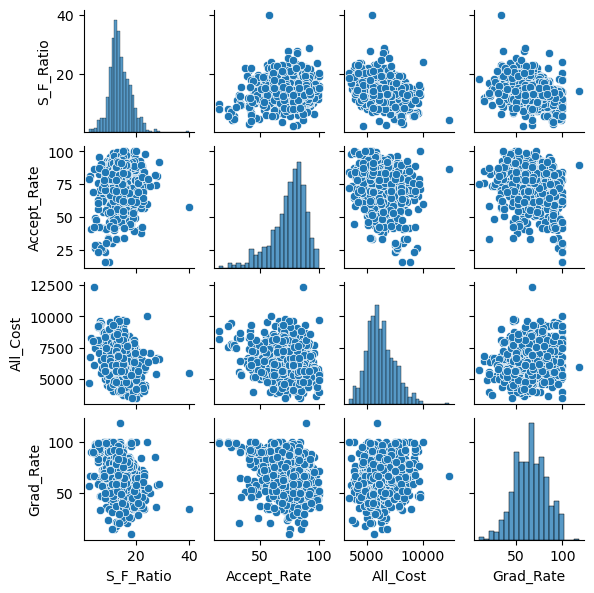

In [7]:
sns.pairplot(df, height=1.5)
plt.show()

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Feature"] = x.columns

vif_data["VIF"] = [ variance_inflation_factor(x.values ,i) for i in range(x.shape[1] )  ]
vif_data

,Feature,VIF
0,S_F_Ratio,11.229843
1,Accept_Rate,15.884784
2,All_Cost,11.678252


In [25]:
import statsmodels.formula.api as smf

model = smf.ols(formula = 'Grad_Rate ~ S_F_Ratio + Accept_Rate + All_Cost', data=df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Grad_Rate   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     51.96
Date:                Tue, 03 Dec 2024   Prob (F-statistic):           1.34e-30
Time:                        12:37:07   Log-Likelihood:                -3240.1
No. Observations:                 777   AIC:                             6488.
Df Residuals:                     773   BIC:                             6507.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      92.1770      5.568     16.556      0.000      81.248     103.106
S_F_Ratio      -1.1095      0.147     -7.528      0.000      -1.399      -0.820
Accept_Rate    -0.2678      0.040     -6.679      0.000      -0.346      -0.189
All_Cost        0.0014      0.000      2.863      0.004       0.000       0.002
==============================================================================
Omnibus:                       18.404   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.567
Skew:                          -0.317   Prob(JB):                     3.42e-05
Kurtosis:                       3.484   Cond. No.                     6.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<Axes: xlabel='All_Cost', ylabel='Grad_Rate'>

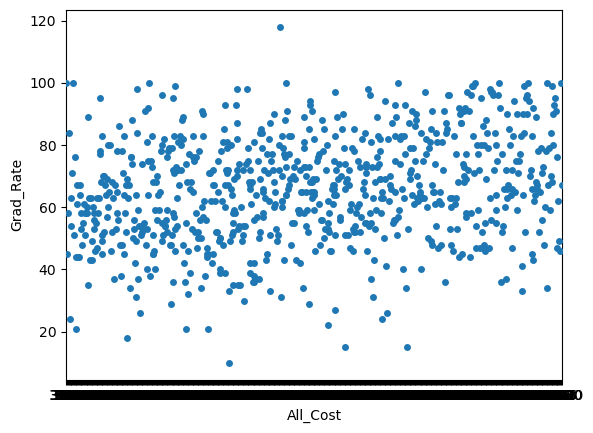

In [27]:
sns.stripplot(x="All_Cost", y="Grad_Rate", data=df)

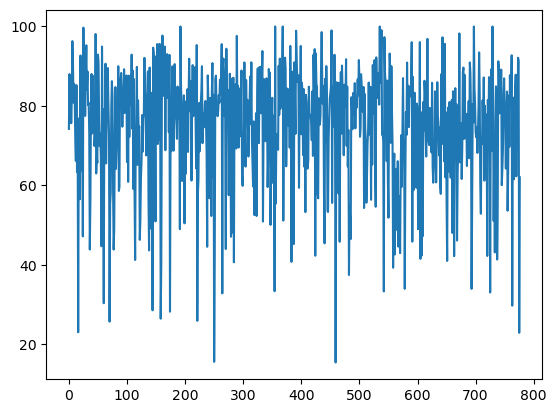

In [19]:
x_point = df[['Accept_Rate']]
plt.plot(x_point)

<Axes: >

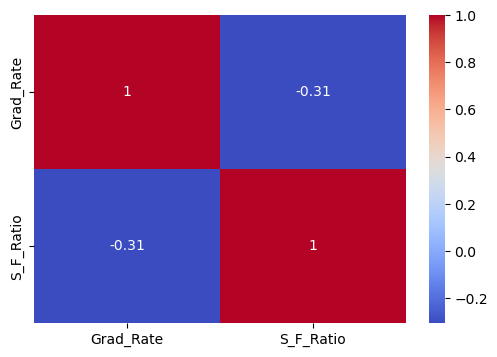

In [29]:
correlation = df[['Grad_Rate', 'S_F_Ratio']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', cbar=True)